#### K-Means   k-평균 - 비지도 학습 - 군집(Cluster)
```
초기 중심점 설정 (Centroid)
데이터 할당(Assignment)
중심점 업데이트(Update)
```

In [ ]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits.shape  # 이미지  100 x 100

(300, 100, 100)

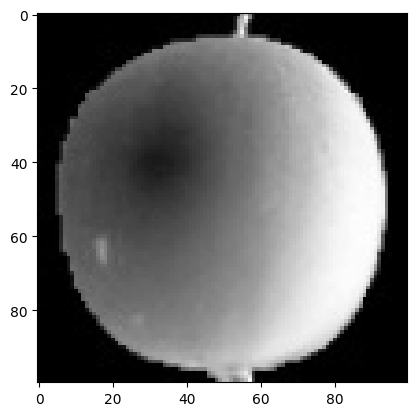

In [17]:
import matplotlib.pyplot as plt
plt.imshow(fruits[0],cmap = 'gray')
plt.show()


In [33]:
from sklearn.cluster import KMeans  # sklearn 계열은 학습데이터는 2차원 ndim 2
km = KMeans(n_clusters=3, random_state=42)
f2d = fruits.reshape(300,-1)
km.fit(f2d)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [37]:
km.cluster_centers_

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.10204082, 1.07142857, 1.10204082, ..., 1.        , 1.        ,
        1.        ],
       [1.01111111, 1.01111111, 1.01111111, ..., 1.        , 1.        ,
        1.        ]], shape=(3, 10000))

In [39]:
km.labels_[:10]

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2], dtype=int32)

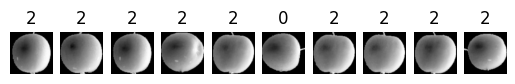

In [45]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(fruits[i],cmap = 'gray')
    plt.title(km.labels_[i])
plt.show()

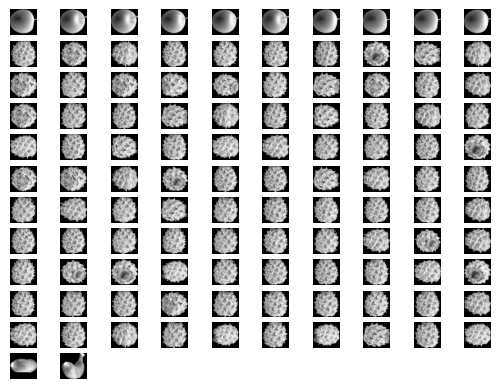

In [ ]:
for i,apple in enumerate(fruits[km.labels_ == 0]):
    plt.subplot(12,10,i+1)
    plt.axis('off')
    plt.imshow(apple,cmap = 'gray')

In [ ]:
# 최적의 k 값 찾기  엘보우 
#  클러터의 응집도 측정하는 성능지표  각 데이터 포인터가 자신이 속한 클러스터의 중심과 얼마나 가까운지를 나타내는 총 거리합
# 클러스터가 많을수록 줄어드는 특징
# 그래프에서 k가 증가하면서 inertia_ 감소폭이 급격히 줄어드는 지점이 적절한 k
# 거리기반.. 평균... 이상치에 민감....
# 스케일링 필수
km.inertia_  


5075273831.931916

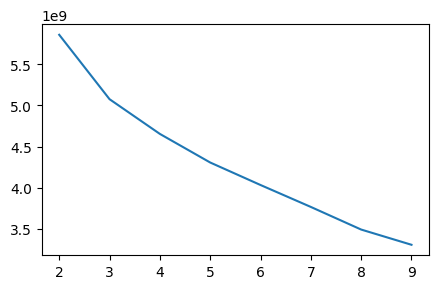

In [71]:
import matplotlib.pyplot as plt
inertia = []
plt.figure(figsize=(5,3))
for k in range(2,10):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(f2d)
    inertia.append(km.inertia_)
plt.plot(range(2,10), inertia) 
plt.show()   